# Desafio Data Science

Importo as bibliotecas necesarias

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import jaccard_similarity_score

In [2]:
bank_data = pd.read_csv("bank/bank-full.csv", sep=';')

display (bank_data.head())

display ("Dimensões da tabela de dados:",bank_data.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


'Dimensões da tabela de dados:'

(45211, 17)

Apos de carregar os datos e conhecer as dimensções procedo solucionar as questões.

# Questão 1: Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

    Os dados que preciso estão nas colunas 'job' (profissões), 'loan' (que indica se tem um emprestimo pessoal) e housing (que indica se tem um empréstimo imobiliário). 'loan' e 'housing' toma valores 'yes' e 'no (variaveis categoricas), dado que precisamos fazer uma contagem dos emprestimos é conveniente transformar os valores destas a números (0 e 1); para esto podemos usar o método get_dummies da biblioteca pandas. 

In [3]:
job_loan_housing = pd.get_dummies(bank_data[["job", "housing", "loan"]], columns=["housing", "loan"])
display(job_loan_housing.head())

,job,housing_no,housing_yes,loan_no,loan_yes
0,management,0,1,1,0
1,technician,0,1,1,0
2,entrepreneur,0,1,0,1
3,blue-collar,0,1,1,0
4,unknown,1,0,1,0


A seguir agruparemos os dados pelo tipo de trabalho e sumaremos os valores das outras celdas, para obter o numero de creditos 'loan' e 'housing' para cada tipo de trabalho

In [4]:
job_loan_housing = job_loan_housing.groupby('job').sum()
display(job_loan_housing.head())

,housing_no,housing_yes,loan_no,loan_yes
job,,,,
admin.,1989.0,3182.0,4180.0,991.0
blue-collar,2684.0,7048.0,8048.0,1684.0
entrepreneur,618.0,869.0,1131.0,356.0
housemaid,842.0,398.0,1088.0,152.0
management,4780.0,4678.0,8205.0,1253.0


Estimaremos, para cada profissão,  as rações entre o número de emprestimos (loan_yes e housing_yes) e o total de clientes com empréstimo (loan_yes + loan_no e housing_yes + housing_no para 'loan' e 'housing' respetivamente). Os valores das rações serão agregados na tabela, nas colunas 'ration loan' e 'ration housing' para 'loan' e 'housing' respetivamente.

In [5]:
num_loan_clients = job_loan_housing.loan_yes + job_loan_housing.loan_no
num_housing_clients = job_loan_housing.loan_yes + job_loan_housing.loan_no

job_loan_housing['ration loan'] = job_loan_housing.loan_yes/num_loan_clients
job_loan_housing['ration housing'] = job_loan_housing.housing_yes/num_housing_clients


Faremos um grafico comparativo entre os dados ordenados primeiro com respeito a 'ration loan' e depois com respeito a 'ration housing' e guardo a figura no arquivo loan_housign_ration.png

<IPython.core.display.Javascript object>


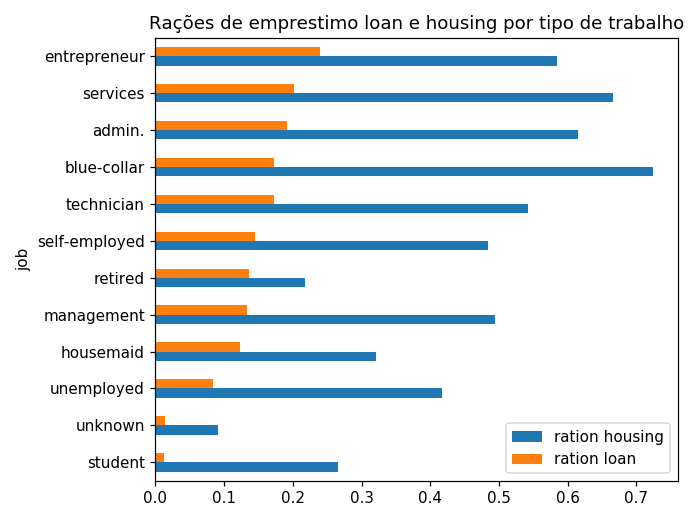

In [6]:
plot1 = job_loan_housing.sort_values(by=["ration loan"])[["ration housing", "ration loan"]].plot.barh()
plot1.set_title("Rações de emprestimo loan e housing por tipo de trabalho")

plt.tight_layout()
plt.savefig('Imagens/loan_housign_ration.png');

    Do gráfico podemos notar que a maioria dos empretimos são do tipo housing, sendo este o mais frequente.  A profeção 'entrepeneur' (emprendedor) tende a fazer mas empretimos pessoais ('loan') e a 'blue-colar' (trabalhadores com renda baixa) tendem a fazer mais emprestimos imobiliários (housing).

# Questão 2: Fazendo uma relação entre número de contatos e sucesso da campanha, quais são os pontos relevantes a serem observados?

Os valores de interese para esta questão estão contidos na tabela bank_data nas colunas 'campaing' (que indica o numero de ligações feitas a um cliente) e 'y' (que indica se o cliente firmou um termo de deposito). Podemos tormar os dados destas colunas, tanto para valores 'yes' e 'no' na columa 'y', e utilizar o método describe() da biblioteca pandas para obter uma descrição estatistica destes datos.

In [7]:
Aux1=bank_data[bank_data.y == 'yes'][['campaign']].describe()
Aux2=bank_data[bank_data.y == 'no'][['campaign']].describe()
describe_bank_data = pd.DataFrame({'Campaing aderidos': Aux1.values[:,0],'Campaing no aderidos' : Aux2.values[:,0]},index=Aux1.index.values)
display(describe_bank_data)


,Campaing aderidos,Campaing no aderidos
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


Podemos ver que o número de cliente aderidos (5289 --> 12%) é menor que o numero não aderidos (39922 --> 88%). Dos dados estatísticos podemos notar que os clientes recibierão 3 ligações em um 75 %, 2 em um 50% e 1 em um 25%.

# Questão 3: Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Para esta pergunta os dados de interese estão nas colunas 'campaign'e 'y' da tabela bank_data. Aqui uso o método <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html">boxplot</a> da biblioteca pandas. 

<IPython.core.display.Javascript object>


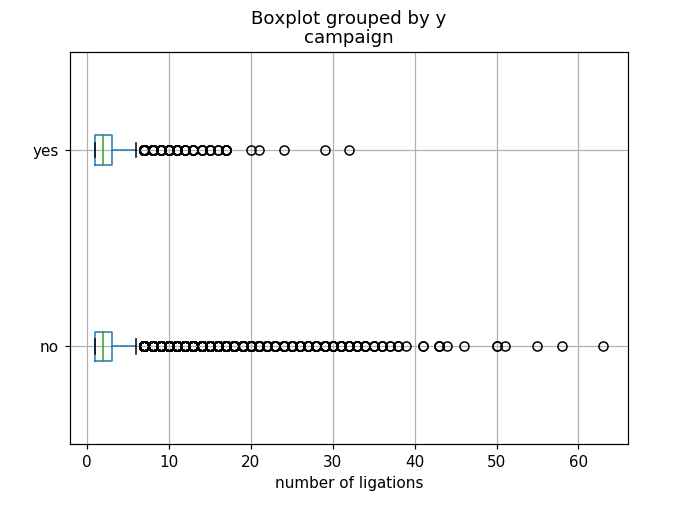

/usr/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:225: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


In [8]:
plot2 = bank_data.boxplot(column="campaign", by="y", vert=False)
plot2.set_xlabel("number of ligations")

plt.savefig('Imagens/Adt_boxplot.png');

Do grafico determino os quadrils $Q_1$ e $Q_3$ (que limitam a caixa) e $Q_2$ (o valor da mediana).
\begin{align}
    Q_1 &= 1,\\
    Q_2 &= 2 \rightarrow \mathrm{mediana},\\
    Q_3 &= 3, \\
    Q_e &= 1.5*\left(Q_3 - Q_1\right) = 3 \rightarrow \mathrm{posição\, dos\, vigodes},
\end{align}
do qual obtemos que o valor do número médio de ligações recomendado é igual a $Q_2=2$) e o número máximo seria de $Q_3 + Q_e=6$. 

# Questão 4: O resultado da campanha anterior tem relevância na campanha atual?

Os dados valores de interse estão nas colunas 'poutcome' (que guarda resultado na campanha previa por cliente) e 'y' (que guarda resultado na campanha atual por cliente). Para esta questão estimo a similaridade entre os dois conjuntos de dados ('poutcome' e 'y') isto é o <a href="https://www.statisticshowto.datasciencecentral.com">coeficiente de Jaccard</a> 
\begin{equation}
    C_{Jaccard}\left(A,B\right) = \frac{A \bigcap B}{A \bigcup B},
\end{equation}
Para estimar isto utilizo a rutina <a href = "http://scikit-learn.org/stable/modules/model_evaluation.html#jaccard-similarity-coefficient-score">jaccard_similarity_score</a> da biblioteca sklearn.metrics, que estima este coeficiente. O valor deste coficiente é entre 0 (sem similaridade) e 1 (similaridade máxima).

Primero pego os dados relevantes da tabela bank_data e transformo estes em numeros, dado que 'poutcome' e 'y' são variaveis categoricas, usando a rutina get_dummies de pandas. O resultado é guardado em poutcome_data.

In [9]:
poutcome_data = pd.get_dummies(bank_data[["poutcome", "y"]])
display(poutcome_data.head())

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,0,0,1,1,0
1,0,0,0,1,1,0
2,0,0,0,1,1,0
3,0,0,0,1,1,0
4,0,0,0,1,1,0


A seguir uso o método jaccard_similarity_score tendo como entrada poutcome_data. 

In [10]:
score = jaccard_similarity_score(poutcome_data["poutcome_success"], poutcome_data["y_yes"])
display("O jaccard score obtido "+str(score))

'O jaccard score obtido 0.892857932804'

Temos que a similaridade é alta entre os dois conjuntos de dados (0.89). Por tanto, um bom número de clientes aderidos na campanha anterior são também aderidos na campanha atual, indicando que a campanha anterior é bastante relevante para a campanha atual.

# Questão 5: Qual o fator determinante para que o banco exija um seguro de crédito?

O fator determinante para o banco exigir um seguro de crédito é dado pelo balanço anual. Para valores de interese para calcular este fator estão nas columas 'default' (indica se tem alguma valor inadimplente ) e 'balance' (o valor promedio anual do balance do cliente) da tabela bank_data. Para analisar estes dados podemos utilizar histogramas, tanto para os clientes inadimplentes como os não inadimplentes. 

A seguir geramos os histogramas, usando a rutima hist de pandas, aqual permite varios histogramas separados usando como criterio o valor almazenado em 'default' (variable categorica).

<IPython.core.display.Javascript object>


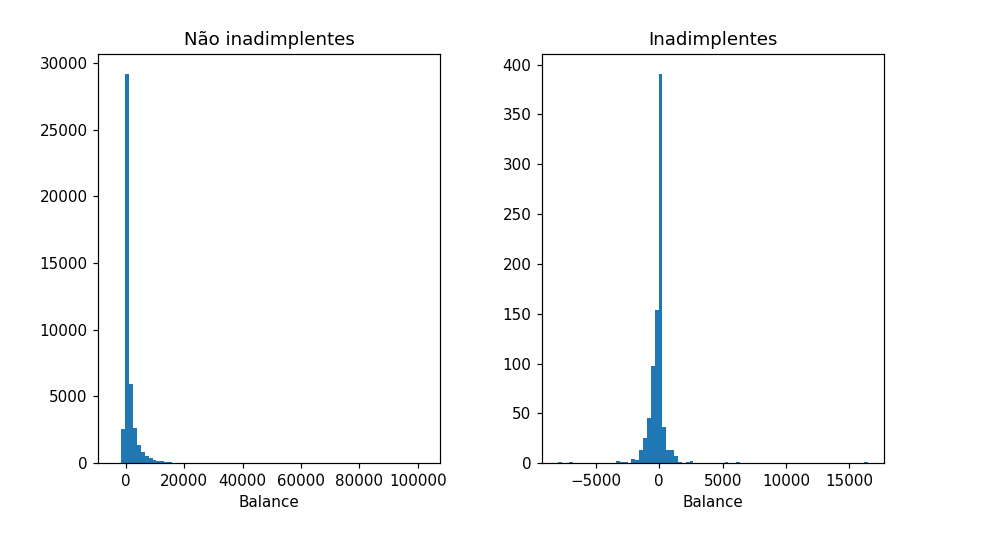

'Media dos não inadimplentes = 1389.8064240021624 with error padrão de: 14.5383167093'

'Media dos inadimplentes = -137.6245398773006 with error padrão de: 31.7604795974'

In [11]:
hist1 = bank_data.hist(column="balance", by="default", bins=80, figsize=(9, 5), xrot=0.5)
hist1[0].set_title('Não inadimplentes')
hist1[1].set_title('Inadimplentes')
hist1[0].set_xlabel('Balance')
hist1[1].set_xlabel('Balance')

without_default  = bank_data[bank_data.default == "no" ]["balance"]
with_default = bank_data[bank_data.default == "yes"]["balance"]

display( "Media dos não inadimplentes = " + str(without_default.mean()) + " with error padrão de: " + str(without_default.sem()))
display( "Media dos inadimplentes = " + str(with_default.mean()) + " with error padrão de: " + str(with_default.sem()))

plt.savefig('Imagens/Histo_balance.png');

Se pode observar que os não inadimplentes apresentan uma media negativa e de valor absoluto menor que os inadimplentes, além de uma desviação padrão superior. 

# Questão 6: Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

    Para isto podemos analizar o grupo de clientes que tem um emprestimo imobiliário, es avaliamos quais são as carateristicas mais frequntes  dentro dos valores contidos nas colunas 'job' (tipo de trabalho), 'marital'(estado civil), 'education' (grão de escolaridade), 'default' (inadimplências), 'balance' (balanço anual) e 'loan' (emprestimos pessoais).

In [12]:
balance_data=bank_data[bank_data.housing == "yes"][['job', 'marital', 'education', 'default', 'loan']].describe()
display(balance_data)

,job,marital,education,default,loan
count,25130,25130,25130,25130,25130
unique,12,3,4,2,2
top,blue-collar,married,secondary,no,no
freq,7048,15321,14038,24695,20763


As características mais proeminentes de um cliente que possue empréstimo imobiliário são

1. Tem um trabalho 'blue-collar'
2. É casado
3. Tem insino fudamental
4. Não é inadimplente
5. E não tem um emprestimo pessoal

